# Assignment 3: Finding The Minimal Energy Configuration Of Charge Particle Within A Circle


_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

## 0. Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from typing import List, Tuple
from itertools import product, combinations
import matplotlib.patches as patches
import random
import itertools

import SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3 as ss3
from importlib import reload

In [18]:
# Reload custom module
reload(ss3)

<module 'SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3' from 'd:\\GitHub\\StochSim\\Assignment 3\\SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3.py'>

## 1. Particle Interactions

Energy of between two patricles is given by:

$E_{i,j}=\dfrac{1}{|_{i,j}|}$


Force on 2 particles:


$\vec F_{i,j}=\frac{\vec r_{i,j}}{|r_{i,j}|^3}$


Source: Assignment 3 description

In [215]:
def get_force_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the electrostatic force between two particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: The vector representing the force exerted on the first particle by the second.
    """

    p_i, p_j = np.array(p_i), np.array(p_j)
    r_i_j = p_i - p_j
    dist_i_j = np.linalg.norm(r_i_j)
    
    # Avoid division by zero by imposing a minimum distance
    min_dist = 1e-10  # A small number to prevent division by zero
    dist_i_j = max(dist_i_j, min_dist)
    
    # Calculate the force vector using Coulomb's Law
    Force_i_j = coulomb_constant * r_i_j / (dist_i_j**3)

    return Force_i_j


def get_energy_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the potential energy between two particles based on Coulomb's Law.

    The potential energy is inversely proportional to the distance between the particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        float: The scalar value of the potential energy between the two particles.
    """

    # Convert positions to numpy arrays for vectorized operations
    p_i, p_j = np.array(p_i), np.array(p_j)

    # Compute the Euclidean distance between particles
    dist_i_j = np.linalg.norm(p_i - p_j)

    # Calculate the potential energy using Coulomb's Law
    Energy_i_j = coulomb_constant / dist_i_j

    return Energy_i_j


The electrostatic potential energy $U_{\mathrm{E}}$ stored in a system of $N$ charges $q_1, q_2, \ldots, q_N$ at positions $\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N$ respectively, is:
$$
U_{\mathrm{E}}=\frac{1}{2} \sum_{i=1}^N q_i \Phi\left(\mathbf{r}i\right)=\frac{1}{2} k_e \sum{i=1}^N q_i \sum_{\substack{j=1 \\ j \neq i}}^N \frac{q_j}{r_{i j}}
$$


we assume $q{i} = q_{j} ... = q_{n} = 1$

In [216]:
def get_energy_total_system(list_of_particles):
    """
    Calculate the total potential energy of a system of particles.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        float: The total potential energy of the system.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize list to store energies
    energies = []

    # Calculate energy between each unique pair of particles
    for p_i, p_j in combinations(list_of_particles, 2):
        energy_of_combi = get_energy_2_particles(p_i, p_j)
        energies.append(energy_of_combi)
    
    # Convert list of energies to numpy array and sum them to get total energy
    total_energy = np.sum(np.array(energies))

    return total_energy



def get_energy_all_particles(list_of_particles):
    """
    Calculate the potential energy on each particle by all other particles in the system.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        numpy.ndarray: An array where each entry is the energy on one particle by all other particles.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize array to store energies for each particle
    energies = np.zeros(len(list_of_particles))

    # Calculate energy on each particle by all other particles
    for i, p_i in enumerate(list_of_particles):
        for j, p_j in enumerate(list_of_particles):
            if i != j:
                energy_of_combi = get_energy_2_particles(p_i, p_j)
                energies[i] += energy_of_combi

    return energies

def get_total_force_on_each_particle(list_of_particles, coulomb_constant=1):
    """
    Calculate the net force on each particle in a system.

    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: An n x 2 matrix representing the net force vectors on each of the n particles.
    """
    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize an array to store the net force on each particle
    net_forces = np.zeros_like(list_of_particles)  # Assuming 2D particles

    # Calculate net force on each particle
    for i, p_i in enumerate(list_of_particles):
        for j, p_j in enumerate(list_of_particles):
            if i != j:
                # Calculate force exerted on p_i by p_j
                force_ij = get_force_2_particles(p_i, p_j, coulomb_constant)
                net_forces[i] += force_ij
    return net_forces

In [217]:
p_i = (0,1)
p_j = (1,2)
force = get_force_2_particles(p_i,p_j)
print('force', force)

force [-0.35355339 -0.35355339]


In [218]:
def in_circle(position, radius):
    """Check if a position is within a circle of given radius centered at the origin."""
    position = np.array(position)
    if position.ndim == 1:  # Check if the array is 1D
        position = position.reshape(1, -1)  # Reshape it to 2D
    elif position.ndim == 0:  # Check if it's a scalar
        raise ValueError("Position must be an array")

    x, y = position.T  # Transpose to separate x and y values
    return (x**2 + y**2) <= radius**2

In [219]:
def randomly_generate_initial_positions(n_particles, radius):
    positions = []
    while len(positions) < n_particles:
        x, y = np.random.uniform(-radius*2, radius*2, size=2)
        position = x,y
        if in_circle(position, radius):
            positions.append([x, y])
    positions = np.array(positions)
    return np.array(positions)

In [220]:
def randomly_generate_particle_matrix(n_particles, radius):
    # Generate initial positions
    positions = randomly_generate_initial_positions(n_particles, radius)
    
    # Calculate forces on each particle
    forces = get_total_force_on_each_particle(positions)

    # Calculate energies for each particle
    energies = get_energy_all_particles(positions)

    # Combine positions, forces, and energies into a single matrix
    particle_matrix = np.hstack((positions, forces, energies.reshape(-1, 1)))

    return particle_matrix

In [221]:
test_data = randomly_generate_particle_matrix(900, 2)
test_data[0]

array([ 1.48309716e+00,  3.12120384e-01, -3.23792912e+02, -3.03021435e+03,
        7.72648899e+02])

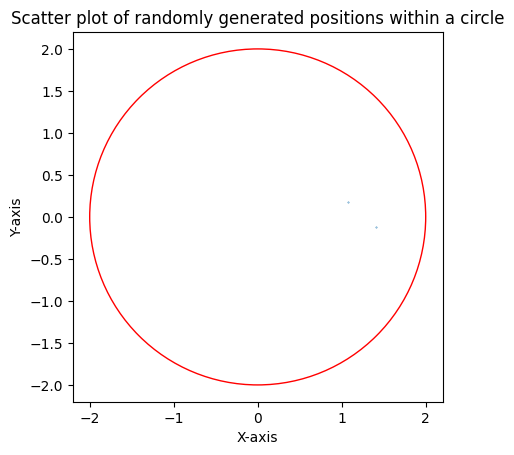

In [222]:
test_data = randomly_generate_initial_positions(900, 2)[:2]
x_coordinates = test_data[:, 0]  # Extract all x-coordinates
y_coordinates = test_data[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=0.1)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of randomly generated positions within a circle')

# Show the plot
plt.show()

In [223]:
def random_change_position_particles(particles, radius, movement_scaler=0.1):
    """Randomly increments x and y of each particle in a list."""
    updated_positions = []
    for particle in particles:
        delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius  # Use shape (2,) for delta_pos
        new_position = particle + delta_pos
        while not in_circle(new_position, radius):
            delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
            new_position = particle + delta_pos
        updated_positions.append(new_position)
    return np.array(updated_positions)

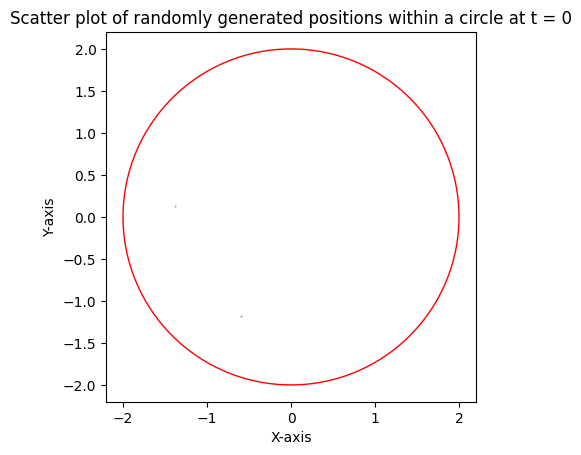

position particle 1 [-0.59347899 -1.17562029]
Total System Energy 0.6567471415974957
Total System Forcse [[ 0.22175425 -0.36994491]
 [-0.22175425  0.36994491]]


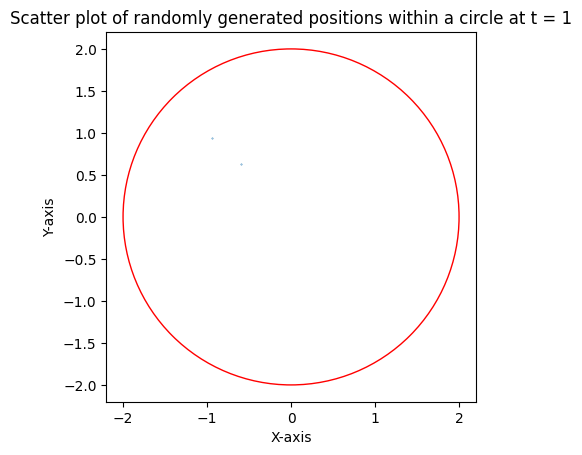

position particle 1 [-0.93937604  0.9359593 ]
Total System Energy 2.191503711677659
Total System Forcse [[-3.61099979  3.16646451]
 [ 3.61099979 -3.16646451]]


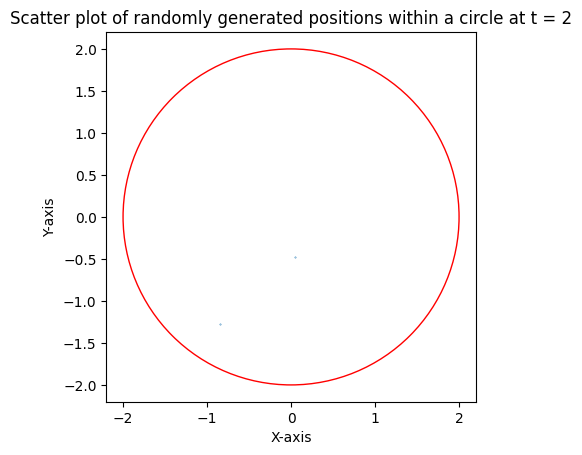

position particle 1 [-0.84699722 -1.27221996]
Total System Energy 0.8331804745061928
Total System Forcse [[-0.5186067 -0.4614612]
 [ 0.5186067  0.4614612]]


In [224]:
test_data = randomly_generate_initial_positions(900, 2)[:2]
radius = 2
timesteps = 3
movement_scaler = 2
for t in range(timesteps):
    x_coordinates = test_data[:, 0]  # Extract all x-coordinates
    y_coordinates = test_data[:, 1]  # Extract all y-coordinates

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Scatter plot
    ax.scatter(x_coordinates, y_coordinates, s=0.1)

    # Create a circle patch with the same radius as used for the position generation
    circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
    ax.add_patch(circle)

    # Set aspect of the plot to be equal, so the circle isn't skewed
    ax.set_aspect('equal', adjustable='box')

    # Setting labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Scatter plot of randomly generated positions within a circle at t = {t}')

    # Show the plot
    plt.show()
    print('position particle 1', test_data[0])
    print('Total System Energy', get_energy_total_system(test_data))
    print('Total System Forcse', get_total_force_on_each_particle(test_data))
    test_data = random_change_position_particles(particles=test_data, radius=radius, movement_scaler=movement_scaler)

In [225]:
def logarithmic_decay_cooling(T_init, t, a, b):
    """https://canvas.uva.nl/courses/39303/pages/lecture-09-the-gibbs-sampler-and-simulated-annealing?module_item_id=1830823 slide 14"""
    T_n = a/(np.log(t+b))
    return T_n



def exponential_decay_cooling(T_init, t, a, b):
    return T_init * (a ** t)


In [226]:
T_init = 100

## 2. Update Functions

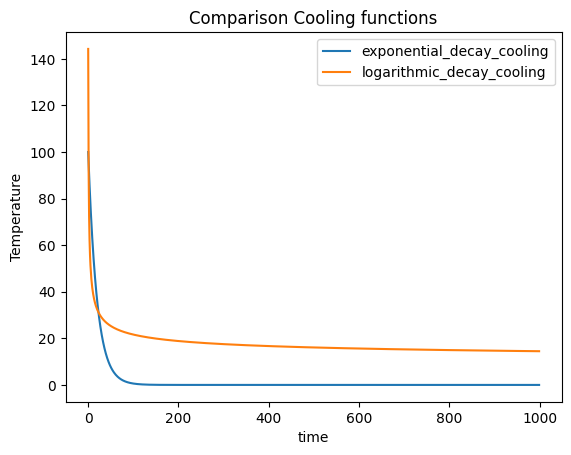

In [227]:
T_init = 100
temperatures_exp = [exponential_decay_cooling(T_init,t, a=0.95,b=4) for t in range(1000)]
temperatures_log = [logarithmic_decay_cooling(T_init,t, a=100,b=2) for t in range(1000)]

plt.title('Comparison Cooling functions')
plt.plot(temperatures_exp, label = 'exponential_decay_cooling')
plt.plot(temperatures_log, label = 'logarithmic_decay_cooling')
plt.legend()
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

In [229]:
def move_particle_radial(particle, radius=2, movement_scaler=1, move_mode = 'random'):
    """Takes a particle which is a positional tuple of (x,y) and returns the new position of this particle"""
    if move_mode == 'random':
        max_radius = 2*radius
        x_old, y_old = particle
        current_theta = np.arctan2(y_old, x_old)
        change_theta = np.random.uniform(0,2*np.pi)
        theta_new = current_theta + change_theta
        current_r_of_particle = np.linalg.norm([x_old, y_old])
        # r_new = np.random.uniform(-current_r_of_particle, max_radius-current_r_of_particle)
        r_new = np.random.uniform(0, max_radius) * movement_scaler

        x_new = r_new*np.cos(theta_new)
        y_new =  r_new*np.sin(theta_new)


        position_new = np.array([x_new, y_new])
        return position_new
    
    if move_mode == 'incremental drop - off':
        max_radius = 2*radius
        x_old, y_old = particle
        current_theta = np.arctan2(y_old, x_old)
        change_theta = np.random.uniform(0,2*np.pi) * movement_scaler
        theta_new = current_theta + change_theta
        current_r_of_particle = np.linalg.norm([x_old, y_old])
        r_step = np.random.uniform(-current_r_of_particle, max_radius-current_r_of_particle) * movement_scaler
        r_new = current_r_of_particle + r_step
        x_new = r_new*np.cos(theta_new)
        y_new =  r_new*np.sin(theta_new)


        position_new = np.array([x_new, y_new])
        return position_new



In [230]:
def get_particle_to_move(particles_matrix):
    # Calculating the magnitudes of forces on each particle
    # Note: Using numpy's vectorized operations for faster computation
    squared_forces = particles_matrix[:, 3]**2 + particles_matrix[:, 4]**2
    magnitudes_of_forces_on_each_particle = np.sqrt(squared_forces)
    
    # Choosing a particle based on the magnitude of the force
    particle_to_move_index = random.choices(range(len(magnitudes_of_forces_on_each_particle)),
                                            weights=magnitudes_of_forces_on_each_particle, k=1)[0]
    return particle_to_move_index

## 3. Simulated Annealing Procedure

In [232]:
# new version, Markov chain length == t_max in this in all modes

def Simulated_Anealing_change_position_particles(particles_matrix, time_range, radius, T_init=1, cooling_function=exponential_decay_cooling, a=100, b=1, movement_func=move_particle_radial, mode='normal', move_mode='random', movement_scaler=1):
    """
    Perform simulated annealing to update particle positions within a specified radius.
    Each iteration in the time_range represents a single particle movement.
    """

    if cooling_function is None:
        raise ValueError("cooling_function must be provided")

    T = T_init
    updated_positions = particles_matrix[:, :2].copy()
    Total_Energy_over_time = np.zeros(time_range)

    for t in range(time_range):
        # Optionally decrease the movement scaler over time for 'incremental drop-off' mode
        if move_mode == 'incremental drop-off':
            movement_scaler /= (1 + t / time_range)

        # Select a particle to move based on the mode
        if mode == 'random':
            particle_index = np.random.randint(particles_matrix.shape[0])
        elif mode == 'force':
            particle_index = get_particle_to_move(particles_matrix)  # Implement this function according to your criteria
        else:
            particle_index = t % particles_matrix.shape[0]  # Cycle through particles for 'normal' mode

        particle = updated_positions[particle_index, :2]
        old_positions = updated_positions.copy()
        Total_energy_old = get_energy_total_system(old_positions)

        # Generate a new position for the particle
        new_position = movement_func(particle, radius, movement_scaler, move_mode)
        while not in_circle(new_position, radius):
            new_position = movement_func(particle, radius, movement_scaler, move_mode)

        test_positions = old_positions.copy()
        test_positions[particle_index] = new_position
        Total_energy_new = get_energy_total_system(test_positions)

        # Probabilistic acceptance of new position
        k = 1  # Boltzmann constant (normalized)
        alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])
        if (Total_energy_new < Total_energy_old) or (np.random.uniform() <= alpha):
            updated_positions[particle_index, :2] = new_position
            if mode == 'force':
                forces = get_total_force_on_each_particle(updated_positions)
                energies = get_energy_all_particles(updated_positions)
                particles_matrix[:, 2:] = np.hstack((forces, energies.reshape(-1, 1)))

        Total_Energy_over_time[t] = get_energy_total_system(updated_positions)
        T = cooling_function(T, t, a, b)
        print('timestep (t):', t)

    # Update forces and energies based on the new positions
    forces = get_total_force_on_each_particle(updated_positions)
    energies = get_energy_all_particles(updated_positions)

    # Correctly update the particles_matrix
    particles_matrix[:, :2] = updated_positions
    particles_matrix[:, 2:2 + forces.shape[1]] = forces
    particles_matrix[:, 2 + forces.shape[1]:] = energies.reshape(-1, 1)

    return particles_matrix, Total_Energy_over_time


In [233]:
# params
n_particles = 12
radius = 2
test_data = randomly_generate_initial_positions(n_particles, radius)[:2]
movement_scaler = 1
time_range = 5000
T_init= 100

In [234]:
test_data = randomly_generate_particle_matrix(n_particles, radius)
run_postions_result_normal, energy_over_time_data_normal = Simulated_Anealing_change_position_particles(test_data, radius=radius, movement_scaler=movement_scaler, time_range=time_range,cooling_function=exponential_decay_cooling, a=0.95,b=7, T_init=T_init, movement_func=move_particle_radial, mode = 'normal')
test_data = randomly_generate_particle_matrix(n_particles, radius)
run_postions_result_force, energy_over_time_data_force= Simulated_Anealing_change_position_particles(test_data, radius=radius, movement_scaler=movement_scaler, time_range=time_range,cooling_function=exponential_decay_cooling, a=0.95,b=7, T_init=T_init, movement_func=move_particle_radial, mode = 'force')
test_data = randomly_generate_particle_matrix(n_particles, radius)
run_postions_result_random, energy_over_time_data_random = Simulated_Anealing_change_position_particles(test_data, radius=radius, movement_scaler=movement_scaler, time_range=time_range,cooling_function=exponential_decay_cooling, a=0.95,b=7, T_init=T_init, movement_func=move_particle_radial, mode = 'random')

timestep (t): 0
timestep (t): 1
timestep (t): 2
timestep (t): 3
timestep (t): 4
timestep (t): 5
timestep (t): 6
timestep (t): 7
timestep (t): 8
timestep (t): 9
timestep (t): 10
timestep (t): 11
timestep (t): 12
timestep (t): 13
timestep (t): 14
timestep (t): 15
timestep (t): 16
timestep (t): 17
timestep (t): 18
timestep (t): 19
timestep (t): 20
timestep (t): 21
timestep (t): 22
timestep (t): 23
timestep (t): 24
timestep (t): 25
timestep (t): 26
timestep (t): 27
timestep (t): 28
timestep (t): 29
timestep (t): 30
timestep (t): 31
timestep (t): 32
timestep (t): 33
timestep (t): 34
timestep (t): 35
timestep (t): 36
timestep (t): 37
timestep (t): 38
timestep (t): 39
timestep (t): 40
timestep (t): 41
timestep (t): 42
timestep (t): 43
timestep (t): 44
timestep (t): 45
timestep (t): 46
timestep (t): 47
timestep (t): 48
timestep (t): 49
timestep (t): 50
timestep (t): 51
timestep (t): 52
timestep (t): 53
timestep (t): 54
timestep (t): 55
timestep (t): 56
timestep (t): 57
timestep (t): 58
timeste

C:\Users\nitai\AppData\Local\Temp\ipykernel_36804\3996596898.py:44: RuntimeWarning: overflow encountered in exp
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])
C:\Users\nitai\AppData\Local\Temp\ipykernel_36804\3996596898.py:44: RuntimeWarning: overflow encountered in scalar divide
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])
C:\Users\nitai\AppData\Local\Temp\ipykernel_36804\3996596898.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])


timestep (t): 370
timestep (t): 371
timestep (t): 372
timestep (t): 373
timestep (t): 374
timestep (t): 375
timestep (t): 376
timestep (t): 377
timestep (t): 378
timestep (t): 379
timestep (t): 380
timestep (t): 381
timestep (t): 382
timestep (t): 383
timestep (t): 384
timestep (t): 385
timestep (t): 386
timestep (t): 387
timestep (t): 388
timestep (t): 389
timestep (t): 390
timestep (t): 391
timestep (t): 392
timestep (t): 393
timestep (t): 394
timestep (t): 395
timestep (t): 396
timestep (t): 397
timestep (t): 398
timestep (t): 399
timestep (t): 400
timestep (t): 401
timestep (t): 402
timestep (t): 403
timestep (t): 404
timestep (t): 405
timestep (t): 406
timestep (t): 407
timestep (t): 408
timestep (t): 409
timestep (t): 410
timestep (t): 411
timestep (t): 412
timestep (t): 413
timestep (t): 414
timestep (t): 415
timestep (t): 416
timestep (t): 417
timestep (t): 418
timestep (t): 419
timestep (t): 420
timestep (t): 421
timestep (t): 422
timestep (t): 423
timestep (t): 424
timestep (

timestep (t): 492
timestep (t): 493
timestep (t): 494
timestep (t): 495
timestep (t): 496
timestep (t): 497
timestep (t): 498
timestep (t): 499
timestep (t): 500
timestep (t): 501
timestep (t): 502
timestep (t): 503
timestep (t): 504
timestep (t): 505
timestep (t): 506
timestep (t): 507
timestep (t): 508
timestep (t): 509
timestep (t): 510
timestep (t): 511
timestep (t): 512
timestep (t): 513
timestep (t): 514
timestep (t): 515
timestep (t): 516
timestep (t): 517
timestep (t): 518
timestep (t): 519
timestep (t): 520
timestep (t): 521
timestep (t): 522
timestep (t): 523
timestep (t): 524
timestep (t): 525
timestep (t): 526
timestep (t): 527
timestep (t): 528
timestep (t): 529
timestep (t): 530
timestep (t): 531
timestep (t): 532
timestep (t): 533
timestep (t): 534
timestep (t): 535
timestep (t): 536
timestep (t): 537
timestep (t): 538
timestep (t): 539
timestep (t): 540
timestep (t): 541
timestep (t): 542
timestep (t): 543
timestep (t): 544
timestep (t): 545
timestep (t): 546
timestep (

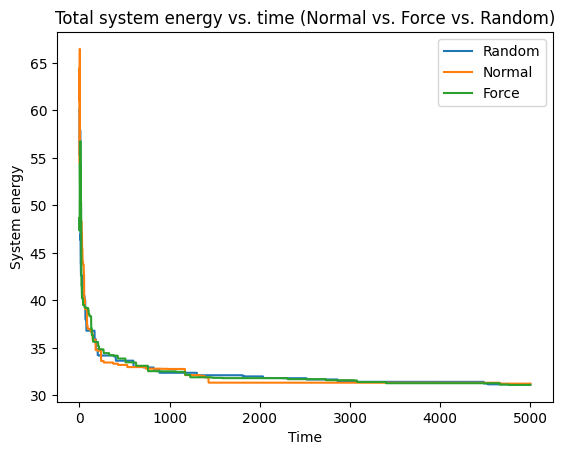

Total System Energy 23.21459659102772
Total System Forces [[-0.38739064 -0.6633946  -0.35871329 -0.2323091   0.0405842 ]
 [ 0.73382366  0.06461389  0.00394763  0.6348906   0.07586241]
 [-0.36471875  0.62155687 -0.51142262  0.27305567  0.05820595]
 [ 0.03267679 -0.01366624 -0.0089511  -0.01439887  0.37032911]
 [-0.54592281 -0.44845481  0.15962788 -0.44441588 -0.16800236]
 [-0.06214931 -0.86766298  0.32926383  0.02984939  0.20008957]
 [ 0.50302528 -0.49024085 -0.24085928 -0.5555438  -0.03185035]
 [ 0.0530485   0.69205635  0.46708101  0.18467424 -0.25308509]
 [-0.78435824  0.04740552 -0.54006519 -0.01977599 -0.19071567]
 [ 0.81908589 -0.24406439  0.29329242 -0.25343881 -0.4517373 ]
 [ 0.40845279  0.78768635  0.53792116 -0.09921037  0.245033  ]
 [-0.40557317  0.51416488 -0.13112246  0.49662293  0.10528653]]


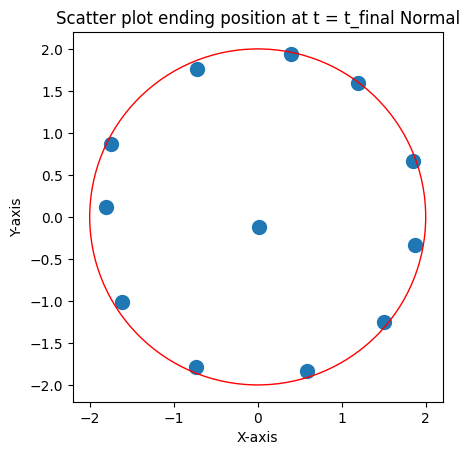

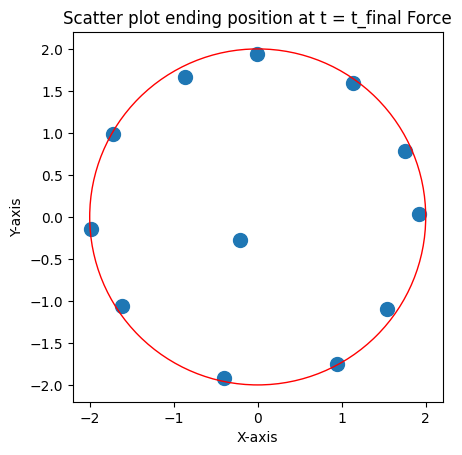

Total System Energy 23.21459659102772
Total System Forces [[-0.38739064 -0.6633946  -0.35871329 -0.2323091   0.0405842 ]
 [ 0.73382366  0.06461389  0.00394763  0.6348906   0.07586241]
 [-0.36471875  0.62155687 -0.51142262  0.27305567  0.05820595]
 [ 0.03267679 -0.01366624 -0.0089511  -0.01439887  0.37032911]
 [-0.54592281 -0.44845481  0.15962788 -0.44441588 -0.16800236]
 [-0.06214931 -0.86766298  0.32926383  0.02984939  0.20008957]
 [ 0.50302528 -0.49024085 -0.24085928 -0.5555438  -0.03185035]
 [ 0.0530485   0.69205635  0.46708101  0.18467424 -0.25308509]
 [-0.78435824  0.04740552 -0.54006519 -0.01977599 -0.19071567]
 [ 0.81908589 -0.24406439  0.29329242 -0.25343881 -0.4517373 ]
 [ 0.40845279  0.78768635  0.53792116 -0.09921037  0.245033  ]
 [-0.40557317  0.51416488 -0.13112246  0.49662293  0.10528653]]


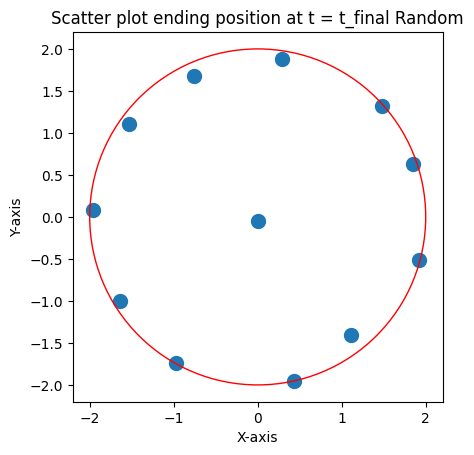

Total System Energy 23.21459659102772
Total System Forces [[-0.38739064 -0.6633946  -0.35871329 -0.2323091   0.0405842 ]
 [ 0.73382366  0.06461389  0.00394763  0.6348906   0.07586241]
 [-0.36471875  0.62155687 -0.51142262  0.27305567  0.05820595]
 [ 0.03267679 -0.01366624 -0.0089511  -0.01439887  0.37032911]
 [-0.54592281 -0.44845481  0.15962788 -0.44441588 -0.16800236]
 [-0.06214931 -0.86766298  0.32926383  0.02984939  0.20008957]
 [ 0.50302528 -0.49024085 -0.24085928 -0.5555438  -0.03185035]
 [ 0.0530485   0.69205635  0.46708101  0.18467424 -0.25308509]
 [-0.78435824  0.04740552 -0.54006519 -0.01977599 -0.19071567]
 [ 0.81908589 -0.24406439  0.29329242 -0.25343881 -0.4517373 ]
 [ 0.40845279  0.78768635  0.53792116 -0.09921037  0.245033  ]
 [-0.40557317  0.51416488 -0.13112246  0.49662293  0.10528653]]


In [235]:

plt.plot(energy_over_time_data_random, label= 'Random')
plt.plot(energy_over_time_data_normal, label='Normal')
plt.plot(energy_over_time_data_force, label='Force')
plt.legend()
plt.title('Total system energy vs. time (Normal vs. Force vs. Random)')
plt.xlabel('Time')
plt.ylabel('System energy')
plt.show()


x_coordinates = run_postions_result_normal[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result_normal[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=100)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), radius, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot ending position at t = t_final Normal')

# Show the plot
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))

x_coordinates = run_postions_result_force[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result_force[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=100)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), radius, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot ending position at t = t_final Force')


# Show the plot
plt.show()
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))



x_coordinates = run_postions_result_random[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result_random[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=100)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), radius, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot ending position at t = t_final Random')


# Show the plot
plt.show()
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))

In [261]:
def run_simulations(particles_matrix, n_sims, param_dict, SA_function):
    """
    Run multiple simulations of particle annealing with varying parameters.

    Parameters:
    - particles_matrix: The matrix of particles to be used in the simulations.
    - param_dict (dict): Dictionary containing different sets of parameters for each simulation.
        Each key in the dictionary represents a parameter name, and its value is a list of values for that parameter.

    Returns:
    - results_df (pandas DataFrame): DataFrame containing results of all simulations.
    """


    # Extract parameters for combinations
    mode_list = param_dict.pop('mode_list', ['normal'])
    move_mode_list = param_dict.pop('move_mode_list', ['random'])
    cooling_functions = param_dict.pop('cooling_function_list', [exponential_decay_cooling])

    # Prepare to collect results
    results = []

    possible_param_combinations = list(itertools.product(mode_list, move_mode_list, cooling_functions))
    number_of_possible_param_combination = len(possible_param_combinations)

    print('Possible param combinations:', number_of_possible_param_combination)

    sim_id = 0  # Initialize simulation ID

    for mode, move_mode, cooling_function in possible_param_combinations:
        # Run the simulation
        print('Progress %:', sim_id/(number_of_possible_param_combination*n_sims)*100)
        print('sim_id:', sim_id)

        # Update parameters for current combination
        current_params = {key: value for key, value in param_dict.items()}
        current_params['particles_matrix'] = particles_matrix  # Adding particles_matrix (input data) to the current params
        current_params['mode'] = mode
        current_params['move_mode'] = move_mode
        current_params['cooling_function'] = cooling_function


        # This variable is only made to remove particles from params when printed
        params_without_data = current_params.copy()
        params_without_data.pop('particles_matrix', None)

        print('Running simulation with params:', params_without_data)

        for sim in range(n_sims):
            
            final_positions, total_energy_over_time = SA_function(**current_params)

            # Save the results
            result = {
                'sim_id': sim_id,
                'mode': mode,
                'move_mode': move_mode,
                'cooling_function': cooling_function.__name__ if cooling_function else 'None',
                'final_positions': final_positions,
                'total_energy_over_time': total_energy_over_time
            }
            results.append(result)

            sim_id += 1  # Increment simulation ID for the next run

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    return results_df

In [262]:
# Params 

n_particles = 12
time_range = 100
radius = 5.0
T_init = 100
movement_function = move_particle_radial
movement_scaler = 0.1
mode_list = ['normal', 'force', 'random']
move_mode_list =  ['random', 'incremental drop-off']
cooling_function_list = [logarithmic_decay_cooling, exponential_decay_cooling]
# in case of logarithmic_decay_cooling, make sure to define a and b. If not logarithmic, a and b are not used so no need to define
a=0.95
b=7
n_sims = 10

In [263]:
# Generating starting particles
data = randomly_generate_particle_matrix(n_particles, radius)

In [264]:
# Wrap data & all params in a param dict

param_dict = {
    'particles_matrix': data,  # Example particle positions
    'time_range': time_range,  # Number of iterations for annealing
    'radius': radius,  # Movement radius
    'T_init': T_init,  # Initial temperature
    'a': a,  # Parameter for cooling function, only in case of logarithmic cooling
    'b': b,  # Another parameter for cooling function , only in case of logarithmic cooling
    'movement_func': movement_function,  # Movement function
    'movement_scaler': movement_scaler,  # Scale of movement
    'mode_list': mode_list,  # Modes to iterate over
    'move_mode_list': move_mode_list,  # Move modes to iterate over
    'cooling_function_list': cooling_function_list  # Cooling functions to iterate over
}

In [265]:
# Perform simualtion runs
run_data = run_simulations(particles_matrix=data, n_sims=n_sims, param_dict=param_dict, SA_function=Simulated_Anealing_change_position_particles)

Possible param combinations: 12
Progress %: 0.0
sim_id: 0
Running simulation with params: {'time_range': 100, 'radius': 5.0, 'T_init': 100, 'a': 0.95, 'b': 7, 'movement_func': <function move_particle_radial at 0x000002DDB5244860>, 'movement_scaler': 0.1, 'mode': 'normal', 'move_mode': 'random', 'cooling_function': <function logarithmic_decay_cooling at 0x000002DDB551AE80>}
timestep (t): 0
timestep (t): 1
timestep (t): 2
timestep (t): 3
timestep (t): 4
timestep (t): 5
timestep (t): 6
timestep (t): 7
timestep (t): 8
timestep (t): 9
timestep (t): 10
timestep (t): 11
timestep (t): 12
timestep (t): 13
timestep (t): 14
timestep (t): 15
timestep (t): 16
timestep (t): 17
timestep (t): 18
timestep (t): 19
timestep (t): 20
timestep (t): 21
timestep (t): 22
timestep (t): 23
timestep (t): 24
timestep (t): 25
timestep (t): 26
timestep (t): 27
timestep (t): 28
timestep (t): 29
timestep (t): 30
timestep (t): 31
timestep (t): 32
timestep (t): 33
timestep (t): 34
timestep (t): 35
timestep (t): 36
times

C:\Users\nitai\AppData\Local\Temp\ipykernel_36804\3996596898.py:44: RuntimeWarning: overflow encountered in exp
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])


timestep (t): 93
timestep (t): 94
timestep (t): 95
timestep (t): 96
timestep (t): 97
timestep (t): 98
timestep (t): 99
timestep (t): 0
timestep (t): 1
timestep (t): 2
timestep (t): 3
timestep (t): 4
timestep (t): 5
timestep (t): 6
timestep (t): 7
timestep (t): 8
timestep (t): 9
timestep (t): 10
timestep (t): 11
timestep (t): 12
timestep (t): 13
timestep (t): 14
timestep (t): 15
timestep (t): 16
timestep (t): 17
timestep (t): 18
timestep (t): 19
timestep (t): 20
timestep (t): 21
timestep (t): 22
timestep (t): 23
timestep (t): 24
timestep (t): 25
timestep (t): 26
timestep (t): 27
timestep (t): 28
timestep (t): 29
timestep (t): 30
timestep (t): 31
timestep (t): 32
timestep (t): 33
timestep (t): 34
timestep (t): 35
timestep (t): 36
timestep (t): 37
timestep (t): 38
timestep (t): 39
timestep (t): 40
timestep (t): 41
timestep (t): 42
timestep (t): 43
timestep (t): 44
timestep (t): 45
timestep (t): 46
timestep (t): 47
timestep (t): 48
timestep (t): 49
timestep (t): 50
timestep (t): 51
timeste

ValueError: Position must be an array

### (CODE BELOW USES IMPORTED MODULE)

In [256]:
reload(ss3)

<module 'SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3' from 'd:\\GitHub\\StochSim\\Assignment 3\\SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3.py'>

seed: 860
Initial positions:
[[-2.52975117  1.30555076]
 [ 1.60379886  3.81739053]
 [-0.2855823   2.38315933]
 [ 0.37701622 -1.90420756]
 [-4.62331114  1.37868506]
 [-1.7803525  -0.84240931]
 [-3.83890744 -1.0167645 ]
 [-3.73157947 -1.44827656]
 [-2.20618453  3.17008136]
 [-4.00283626 -2.47211004]
 [-3.09257716  1.22188291]
 [ 0.17097795  4.56692743]]
New position candidates:
[[-1.54496451  1.47931854]
 [ 2.59769571  3.92770393]
 [ 0.70199518  2.22602649]
 [ 1.19040732 -2.48592479]
 [-4.62173588  1.38368514]
 [-0.90198872 -1.32040208]
 [-4.15526692 -0.06812512]
 [-3.50465279 -2.4221884 ]
 [-2.39921352  4.15127441]
 [-3.79444955 -2.62692501]
 [-4.08893905  1.13665973]
 [ 0.12301852  4.56567569]]
Updated positions:
[[-1.54496451  1.47931854]
 [ 2.59769571  3.92770393]
 [ 0.70199518  2.22602649]
 [ 1.19040732 -2.48592479]
 [-4.62173588  1.38368514]
 [-0.90198872 -1.32040208]
 [-4.15526692 -0.06812512]
 [-3.50465279 -2.4221884 ]
 [-2.39921352  4.15127441]
 [-3.79444955 -2.62692501]
 [-4.08

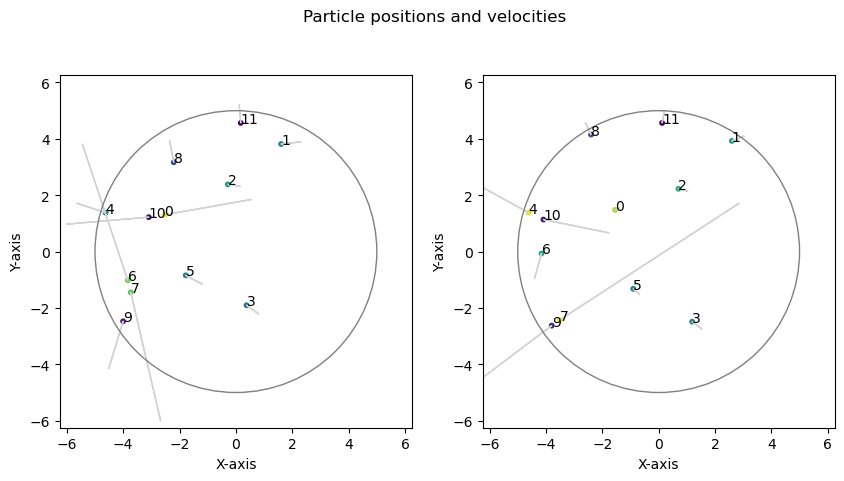

In [257]:
seed = np.random.randint(0, 1000)
print('seed:', seed)
np.random.seed(seed)
test_n  = 12
test_rad = 5

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

test_move_modes = ['random cartesian', 'random polar absolute', 'random polar relative', 'repell']

test_particle_dict = ss3.initialise_particle_dict_random(test_n, test_rad)
print("Initial positions:")
print(test_particle_dict['positions'])
ss3.visualise_particles(test_particle_dict, test_rad, ax=axs[0])
new_pos = ss3.move_particle(test_particle_dict, radius=test_rad, movement_scaler=1, move_mode=test_move_modes[3])
print("New position candidates:")
print(new_pos)
for i in range(test_n):
    ss3.update_particle_dict(test_particle_dict, new_pos[i], i)
print("Updated positions:")
print(test_particle_dict['positions'])
ss3.visualise_particles(test_particle_dict, test_rad, ax=axs[1])

In [262]:
# Simulation parameters
n_particles = 12
time_range = 100
radius = 5.0
T_init = 100
movement_function = ss3.move_particle
movement_scaler = 1
sort_mode_list = ['normal', 'energy', 'random']
move_mode_list =  ['random cartesian', 'random polar absolute', 'random polar relative', 'repell']
cooling_function_list = [ss3.logarithmic_decay_cooling, ss3.exponential_decay_cooling]
# in case of logarithmic_decay_cooling, make sure to define a and b. If not logarithmic, a and b are not used so no need to define
a=0.95
b=7
n_sims = 10

# Generate initial positions
particle_dict = ss3.initialise_particle_dict_random(n_particles, radius)

param_dict = {
    'n_particles': n_particles,  # Number of particles
    'time_range': time_range,  # Number of iterations for annealing
    'radius': radius,  # Movement radius
    'T_init': T_init,  # Initial temperature
    'a': a,  # Parameter for cooling function, only in case of logarithmic cooling
    'b': b,  # Another parameter for cooling function , only in case of logarithmic cooling
    'movement_func': movement_function,  # Movement function
    'movement_scaler': movement_scaler,  # Scale of movement
    'sort_mode_list': sort_mode_list,  # Modes to iterate over
    'move_mode_list': move_mode_list,  # Move modes to iterate over
    'cooling_function_list': cooling_function_list  # Cooling functions to iterate over
}

In [263]:
# Set random seed for reproducibility
np.random.seed(42)

# Perform simualtion runs
run_data = ss3.run_simulations(n_sims=n_sims, param_dict=param_dict, SA_function=ss3.sim_annealing_move_particles)

Possible param combinations: 24
[('normal', 'random cartesian', <function logarithmic_decay_cooling at 0x0000026602B43130>), ('normal', 'random cartesian', <function exponential_decay_cooling at 0x0000026677403E20>), ('normal', 'random polar absolute', <function logarithmic_decay_cooling at 0x0000026602B43130>), ('normal', 'random polar absolute', <function exponential_decay_cooling at 0x0000026677403E20>), ('normal', 'random polar relative', <function logarithmic_decay_cooling at 0x0000026602B43130>), ('normal', 'random polar relative', <function exponential_decay_cooling at 0x0000026677403E20>), ('normal', 'repell', <function logarithmic_decay_cooling at 0x0000026602B43130>), ('normal', 'repell', <function exponential_decay_cooling at 0x0000026677403E20>), ('energy', 'random cartesian', <function logarithmic_decay_cooling at 0x0000026602B43130>), ('energy', 'random cartesian', <function exponential_decay_cooling at 0x0000026677403E20>), ('energy', 'random polar absolute', <function l

In [264]:
print(run_data.head())

   local_sim_id sort_mode         move_mode           cooling_function  \
0             0    normal  random cartesian  logarithmic_decay_cooling   
1             1    normal  random cartesian  logarithmic_decay_cooling   
2             2    normal  random cartesian  logarithmic_decay_cooling   
3             3    normal  random cartesian  logarithmic_decay_cooling   
4             4    normal  random cartesian  logarithmic_decay_cooling   

                                 positions_over_time  \
0  [[[2.0223002348641756, 4.161451555920909], [-3...   
1  [[[-0.4545893523222677, 1.2755808008406344], [...   
2  [[[0.8058835027804347, 1.3226428791953033], [1...   
3  [[[-1.5411694304704326, 1.2091551776747709], [...   
4  [[[-4.565874671451809, 1.3315137559402235], [1...   

                                    forces_over_time  \
0  [[[0.44792843125988585, 0.21701085136140655], ...   
1  [[[-1.3460350228590618, 0.22452484463567618], ...   
2  [[[1.865641444889123, 1.2893175588866819], [0..

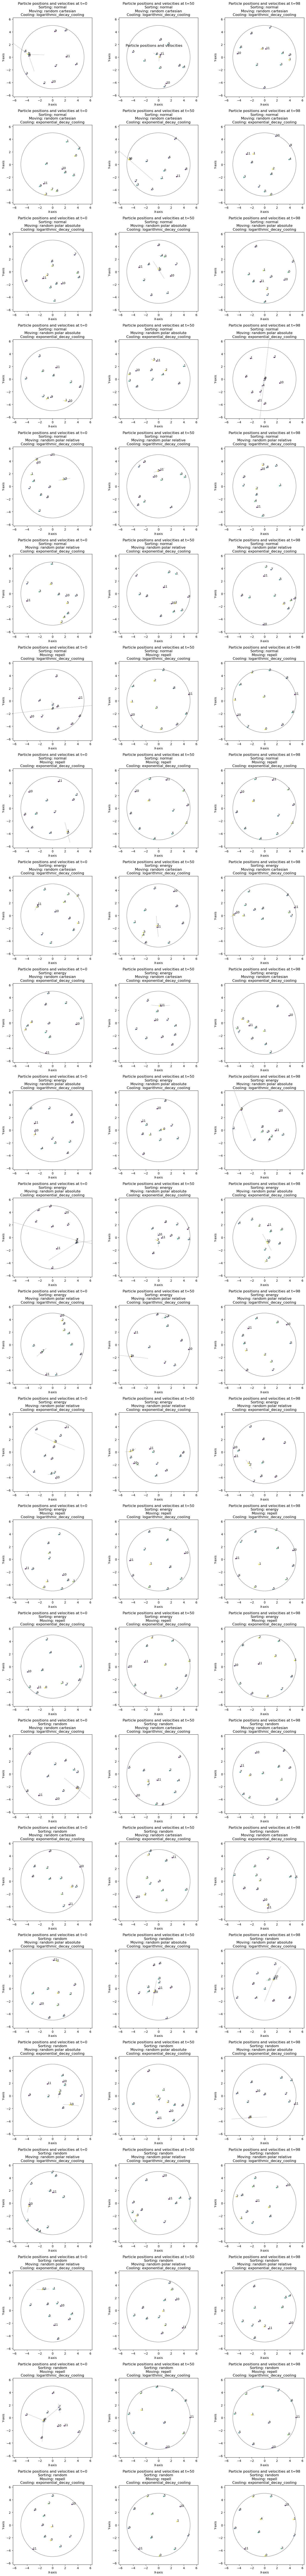

In [265]:
# Visualise snapshots of particle positions
ss3.visualise_particles_at_sim_times(run_data, 0, [0, int(0.5*time_range), time_range-2], radius=5)

d:\GitHub\StochSim\Assignment 3\SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3.py:360: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cooling = df_sim_results_exploded[df_sim_results['cooling_function'] == cooling_function]
d:\GitHub\StochSim\Assignment 3\SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3.py:360: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cooling = df_sim_results_exploded[df_sim_results['cooling_function'] == cooling_function]


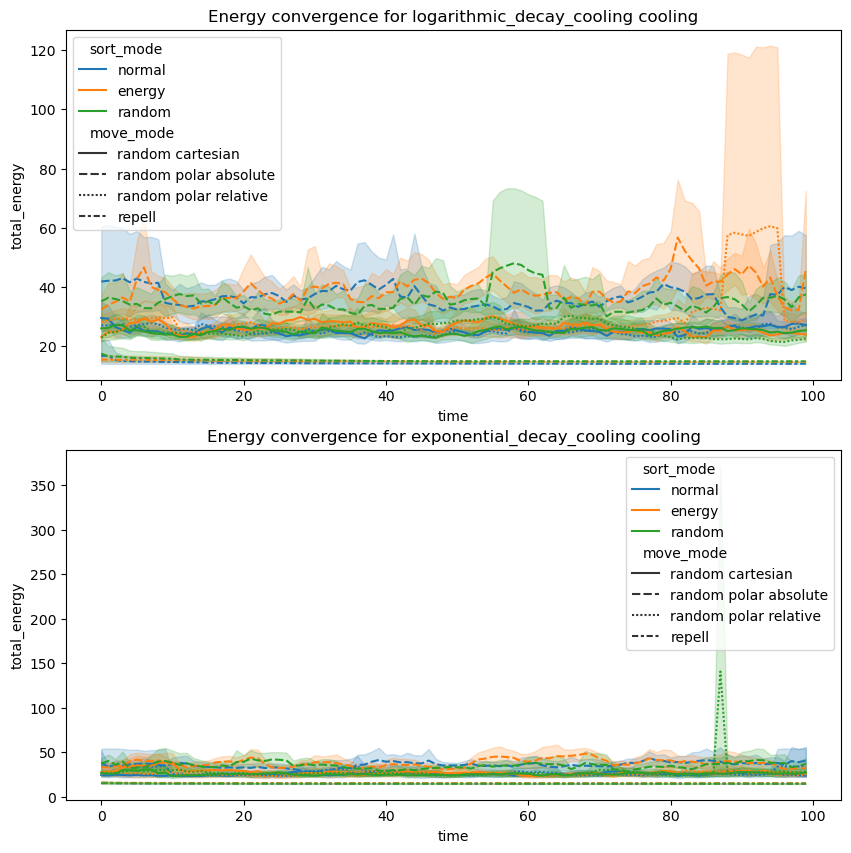

In [266]:
# Visualise energy convergence
ss3.plot_convergence(run_data)